In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Uploading the dataset.
nyc_taxi_trip_duration = pd.read_csv("D://APU/Cecilia ADS Projects/EDA/nyc_taxi_trip_duration.csv")

In [48]:
# Display a sample of the dataset, 1st 5 rows, last 5 rows and data shape(number of observations and number of variables)
nyc_taxi_trip_duration

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [4]:
# the datset has 729,322 observations and 11 variables or columns.

In [5]:
# Metadata visualization.
nyc_taxi_trip_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
# Summary or descriptive statistics of the dataset
nyc_taxi_trip_duration.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [7]:
# Checking for missing values
nyc_taxi_trip_duration.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
# There are no missing values on this dataset, as shown by the output from above.

In [9]:
# Check for inconsistencies or errors
nyc_taxi_trip_duration[nyc_taxi_trip_duration['trip_duration'] <= 0]
if not nyc_taxi_trip_duration.empty:
    print ("inconsistencies or errors found in the trip duration.")


inconsistencies or errors found in the trip duration.


In [10]:
# Checking for unique values
nyc_taxi_trip_duration.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [11]:
nyc_taxi_trip_duration.duplicated().any()

False

In [12]:
# Printing the names of the columns in the dataset.
print(nyc_taxi_trip_duration.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [13]:
nyc_taxi_trip_duration.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000


In [14]:
# grouping the variables
numerical = ["trip_duration", "pickup_hour", "dropoff_hour"]
categorical = ["passenger_count", "pickup_month", "pickup_day_name", "dropoff_month", "dropoff_day_name"]
cat_geofence = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

In [15]:
# 

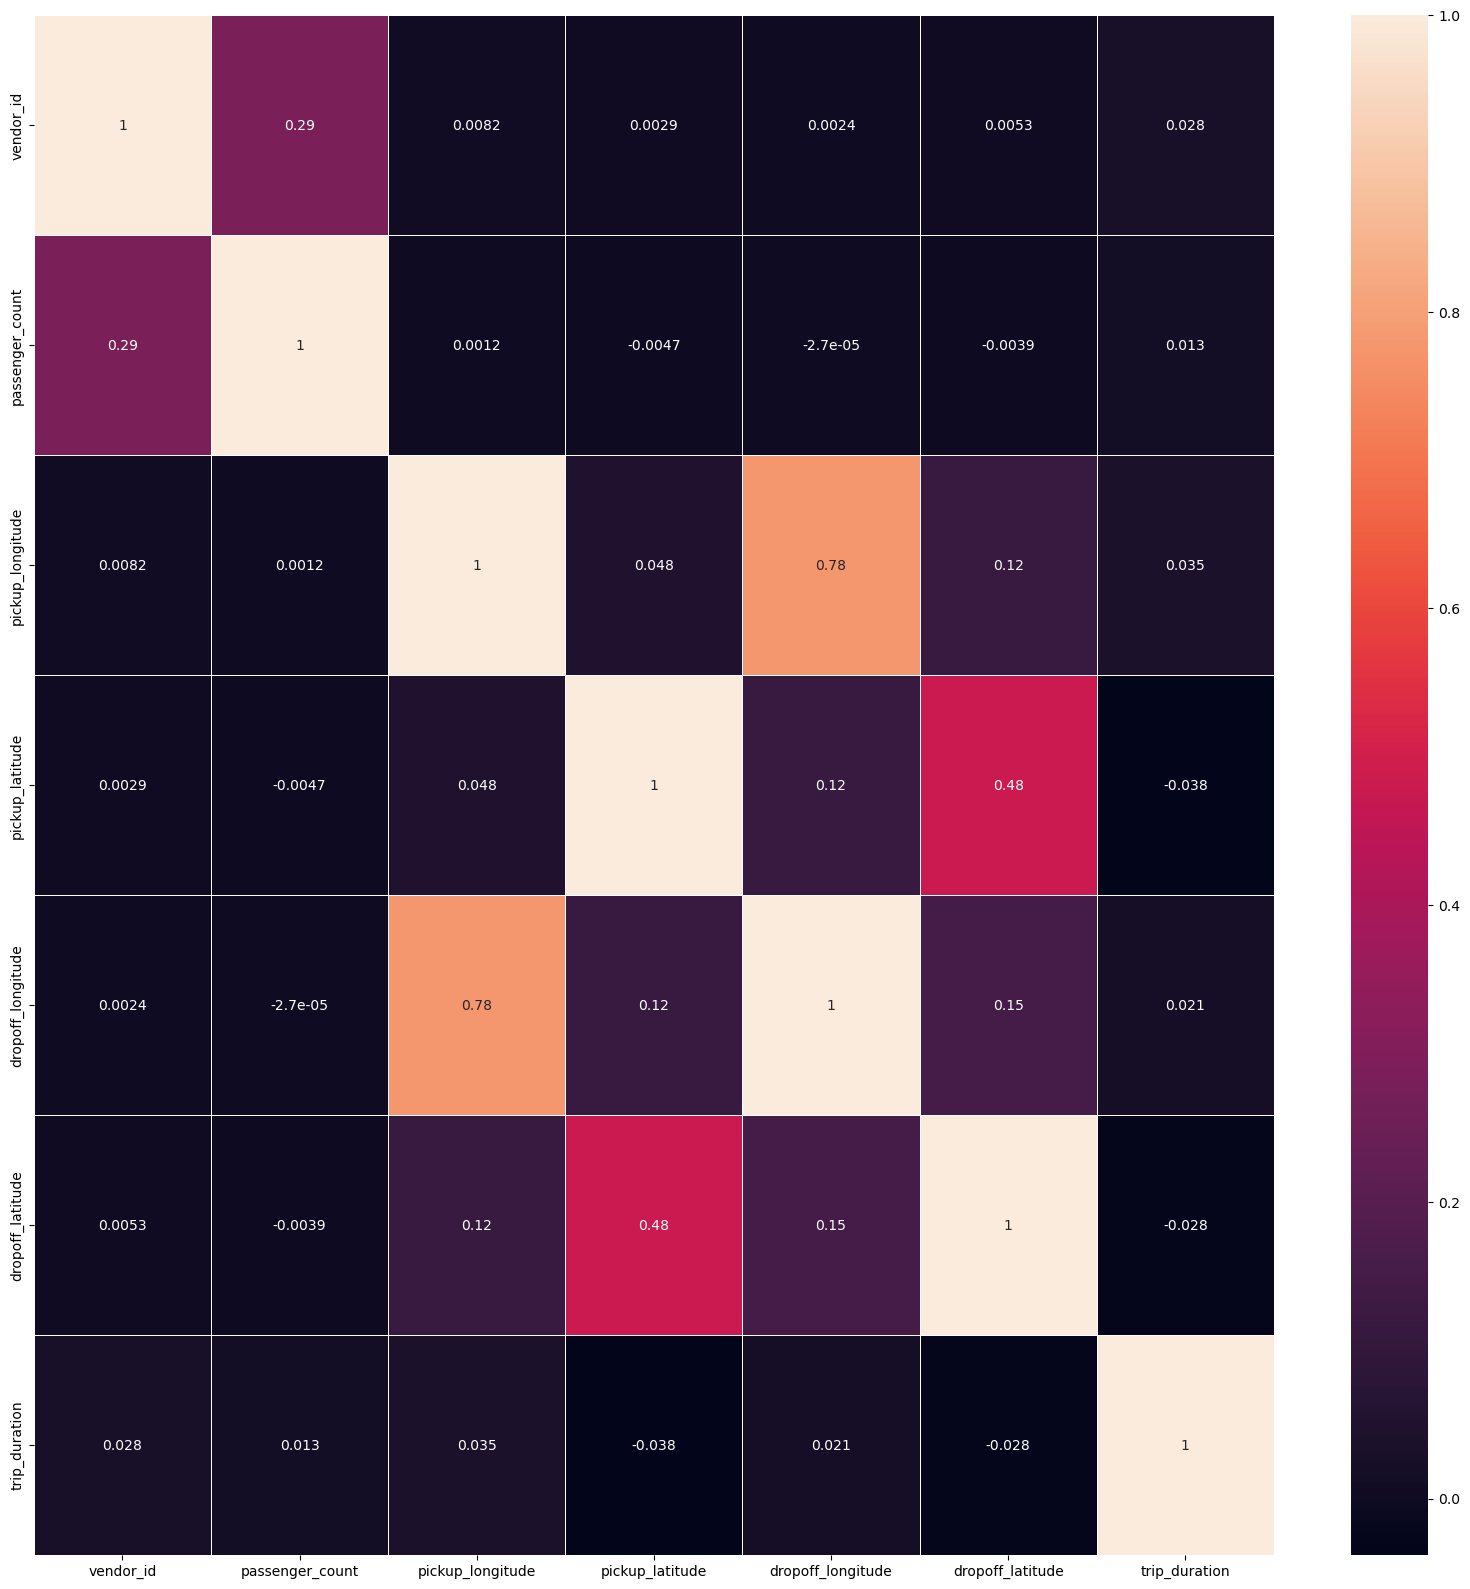

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(nyc_taxi_trip_duration.corr(),linewidths=0.5,annot=True)
plt.show()

In [17]:
# Select the columns for z-score calculation (ensure they are numeric)
numeric_columns = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                   'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
numeric_data = nyc_taxi_trip_duration[numeric_columns].copy()

# Convert string columns to numeric (if needed)
# Example: converting 'vendor_id' column to integers
numeric_data['vendor_id'] = numeric_data['vendor_id'].astype(int)

# Calculate z-scores
z_scores = stats.zscore(numeric_data)

# Identify outliers
outliers = nyc_taxi_trip_duration[np.abs(z_scores) > 3]

# Check if outliers exist
if not outliers.empty:
    print("Outliers found in numeric.")

Outliers found in numeric.


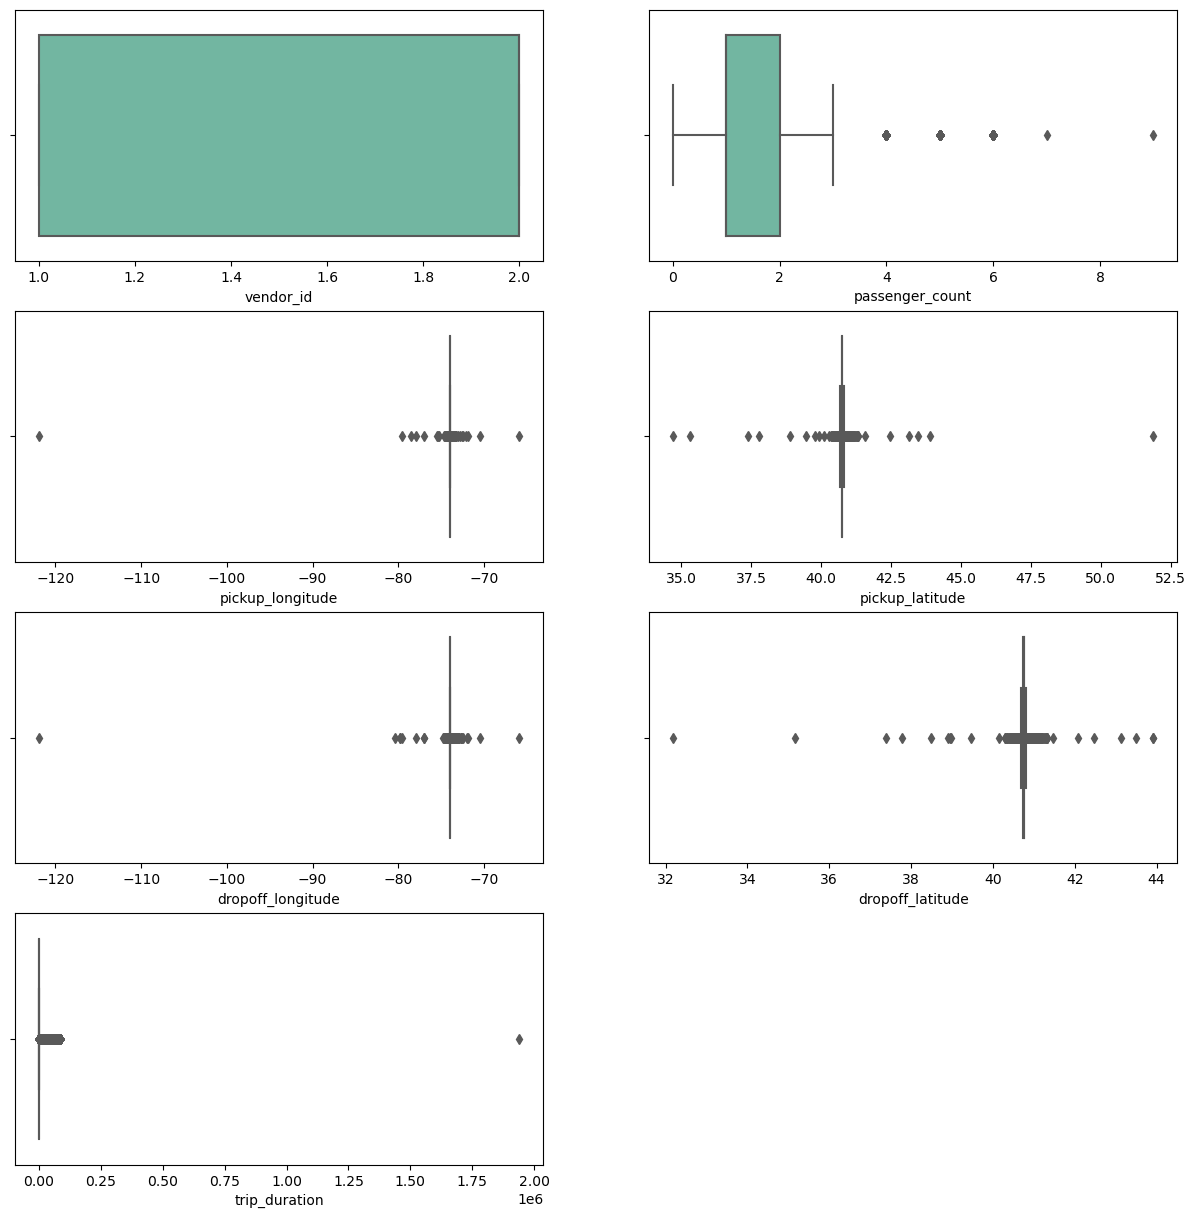

In [18]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                        'dropoff_longitude', 'dropoff_latitude', 'trip_duration']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = nyc_taxi_trip_duration ,palette='Set2')
plt.show()

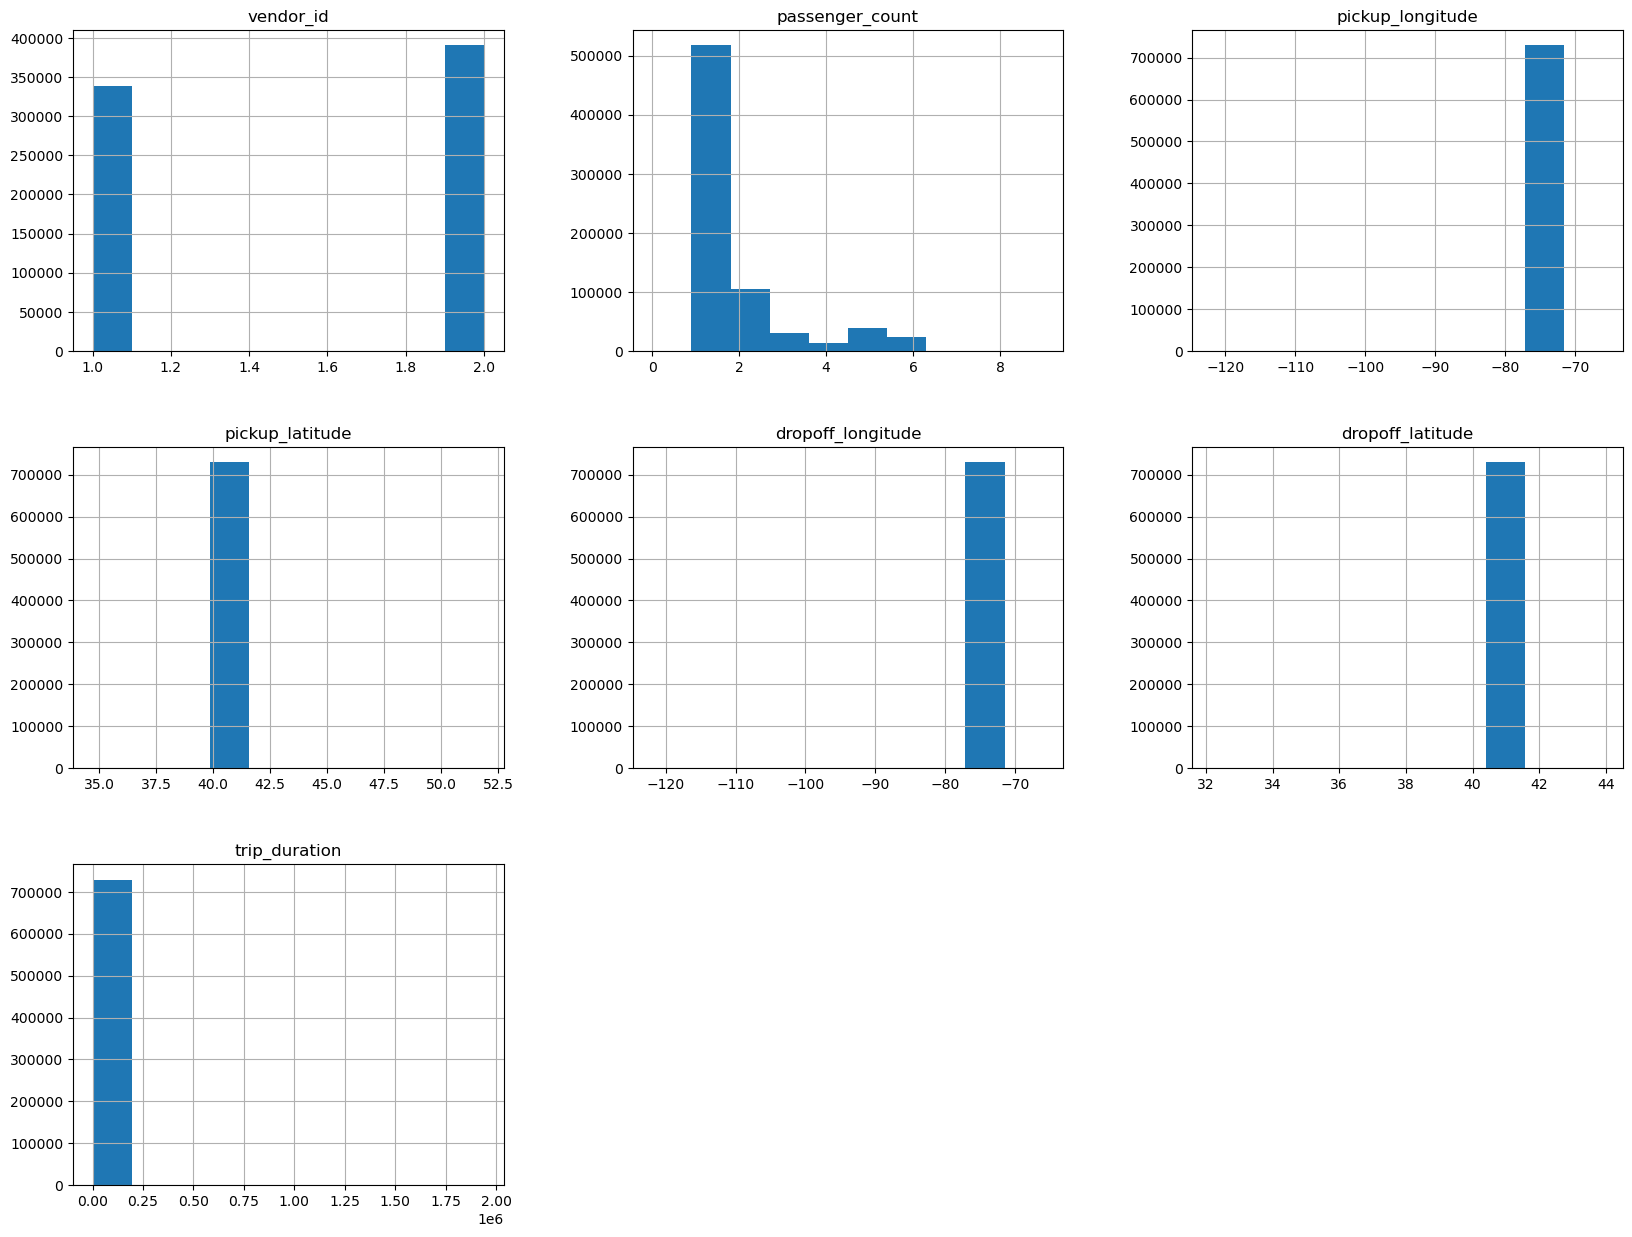

In [19]:
#using histogram to understand dataset data better

nyc_taxi_trip_duration.hist(figsize=(20,15));

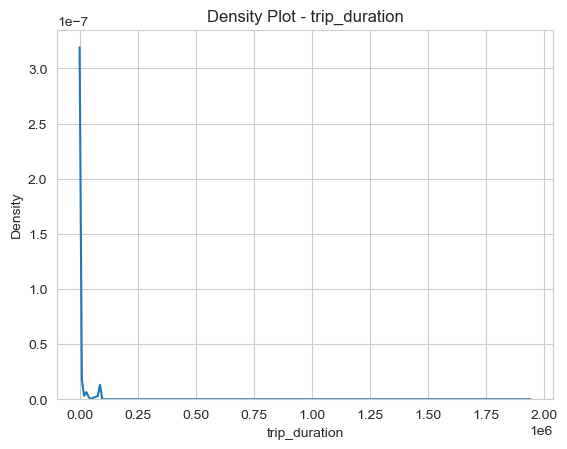

In [20]:
# Assuming 'nyc_taxi_trip_duration' is the DataFrame containing the dataset

# Select the column for which you want to create the density plot
column_name = 'trip_duration'

# Set the plot style
sns.set_style('whitegrid')

# Generate the density plot
sns.kdeplot(data=nyc_taxi_trip_duration[column_name])

# Set plot title and labels
plt.title('Density Plot - {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Density')

# Display the plot
plt.show()

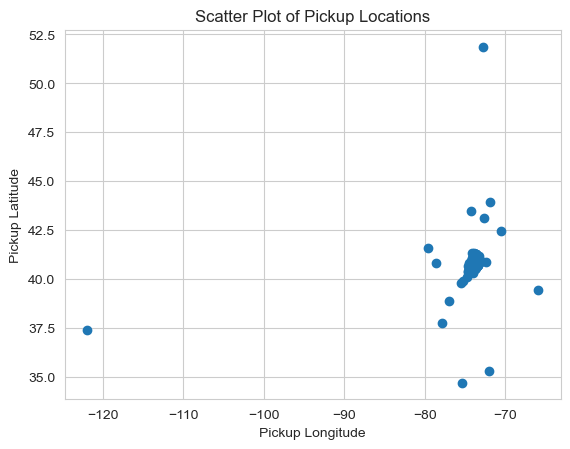

In [21]:
# import matplotlib.pyplot as plt

# Extract the columns for scatter plot
x = nyc_taxi_trip_duration['pickup_longitude']
y = nyc_taxi_trip_duration['pickup_latitude']

# Plotting the scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Scatter Plot of Pickup Locations')

# Displaying the plot
plt.show()

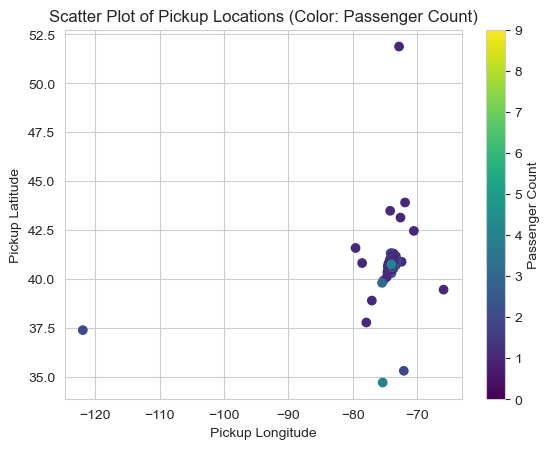

In [22]:
# Extract the columns for scatter plot
x = nyc_taxi_trip_duration['pickup_longitude']
y = nyc_taxi_trip_duration['pickup_latitude']
colors = nyc_taxi_trip_duration['passenger_count']  # Each passenger count value will have a different color

# Plotting the scatter plot with multiple variables
plt.scatter(x, y, c=colors, cmap='viridis')

# Adding labels and title
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Scatter Plot of Pickup Locations (Color: Passenger Count)')

# Adding a colorbar to show the passenger count scale
cbar = plt.colorbar()
cbar.set_label('Passenger Count')

# Displaying the plot
plt.show()

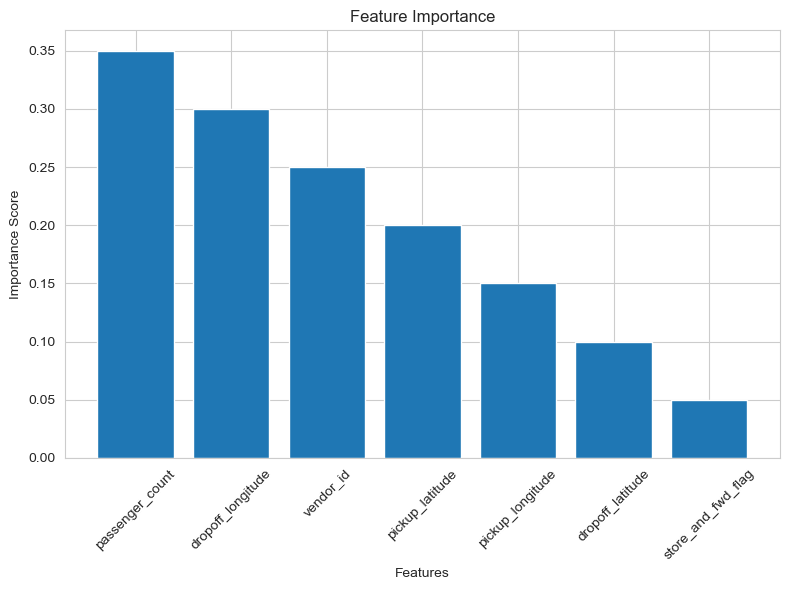

In [23]:
# Calculate or obtain the feature importance scores
feature_names = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag']  # Replace with your actual feature names
importance_scores = [0.25, 0.35, 0.15, 0.2, 0.3, 0.1, 0.05]  # Replace with your actual importance scores

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = np.array(importance_scores)[sorted_indices]
sorted_names = np.array(feature_names)[sorted_indices]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, tick_label=sorted_names)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Drop any non-numeric columns or handle them appropriately
non_numeric_columns = nyc_taxi_trip_duration.select_dtypes(exclude=[np.number]).columns
nyc_taxi_trip_duration = nyc_taxi_trip_duration.drop(non_numeric_columns, axis=1)

# Identify the input features (X) and the target variable (y)
X = nyc_taxi_trip_duration.drop("trip_duration", axis=1)  # Drop the "trip_duration" column
y = nyc_taxi_trip_duration["trip_duration"]

# Apply feature selection using SelectKBest and f_regression scoring
k = 5  # Select the top k features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
vendor_id
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude


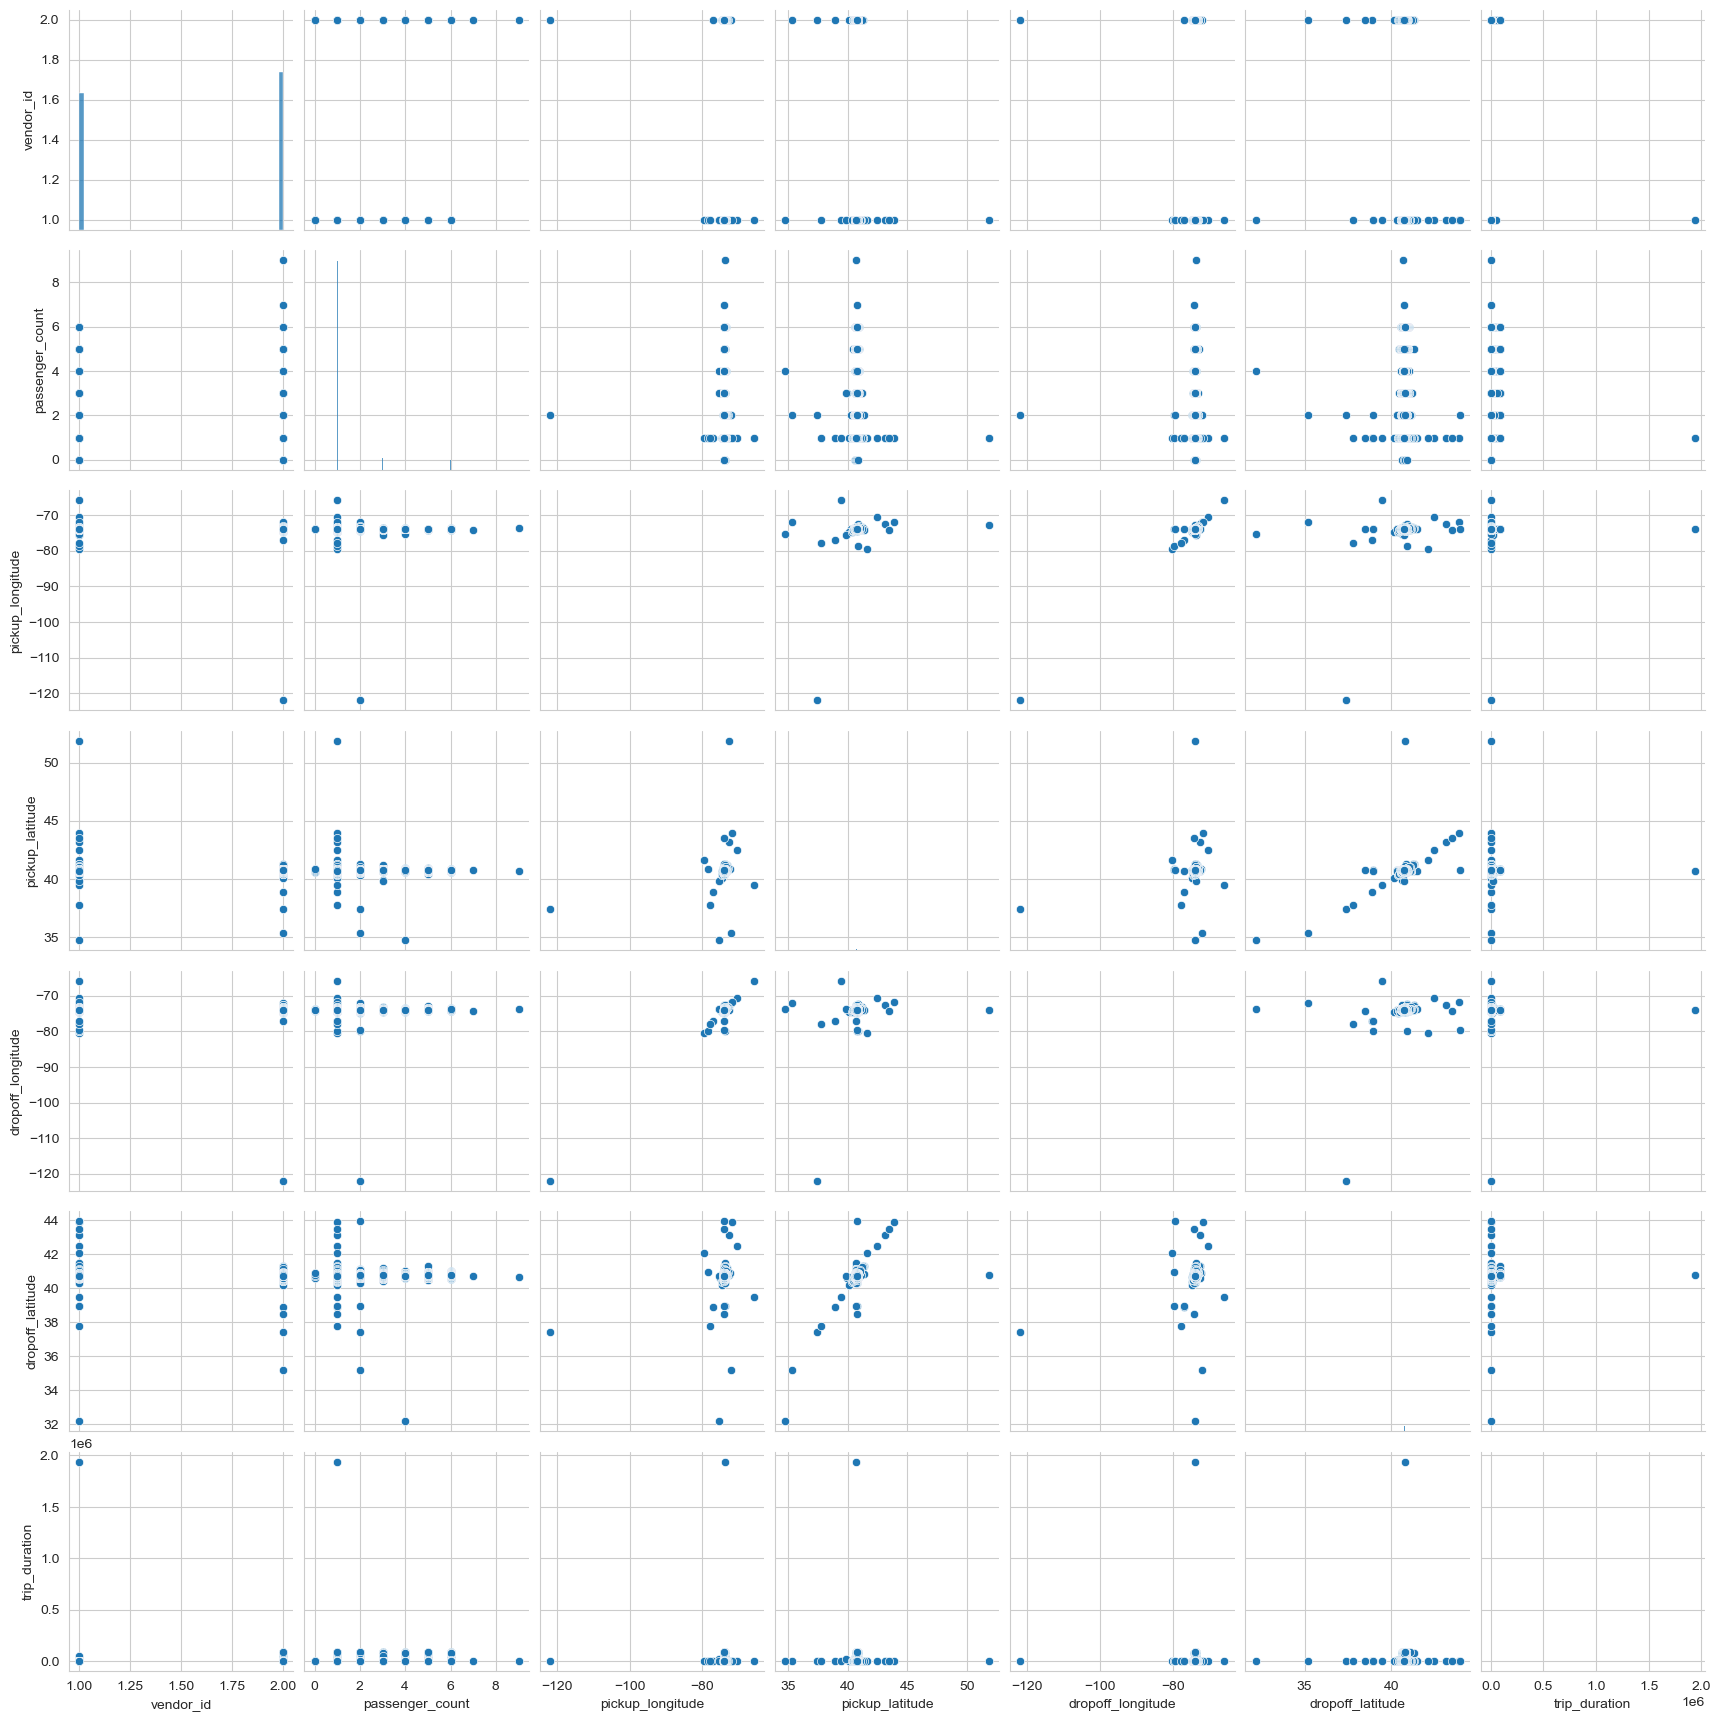

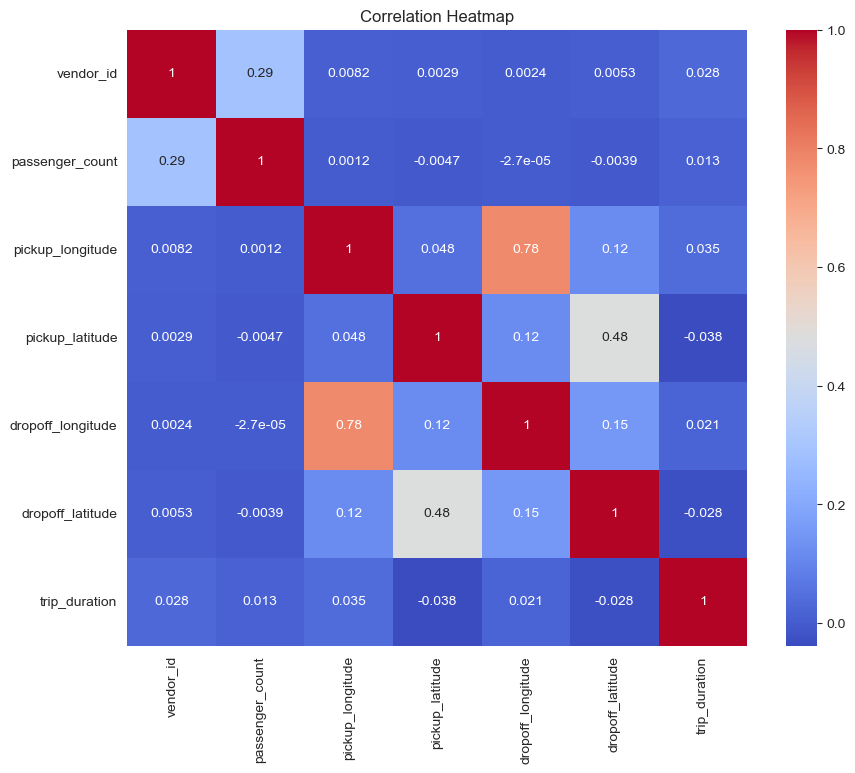

In [25]:
# Plotting scatter plots
sns.pairplot(nyc_taxi_trip_duration)  # This will create scatter plots for each numerical variable against each other
plt.show()

# Calculating correlation matrix
correlation_matrix = nyc_taxi_trip_duration.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Hypothesis testing for the correlation between two variables, such as vendor_id and trip_duration.
# Null hypothesis (H0): There is no correlation between vendor_id and trip_duration.
# Alternative hypothesis (HA): There is a correlation between vendor_id and trip_duration.

In [27]:
# Extract the columns for correlation analysis
vendor_id = nyc_taxi_trip_duration['vendor_id']
trip_duration = nyc_taxi_trip_duration['trip_duration']

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(vendor_id, trip_duration)

# Set the significance level
significance_level = 0.05

# Compare the p-value to the significance level
if p_value < significance_level:
    print("There is a statistically significant correlation between vendor_id and trip_duration.")
else:
    print("There is no statistically significant correlation between vendor_id and trip_duration.")

There is a statistically significant correlation between vendor_id and trip_duration.


           vendor_id  trip_duration
count  729322.000000   7.293220e+05
mean        1.535403   9.522291e+02
std         0.498745   3.864626e+03
min         1.000000   1.000000e+00
25%         1.000000   3.970000e+02
50%         2.000000   6.630000e+02
75%         2.000000   1.075000e+03
max         2.000000   1.939736e+06


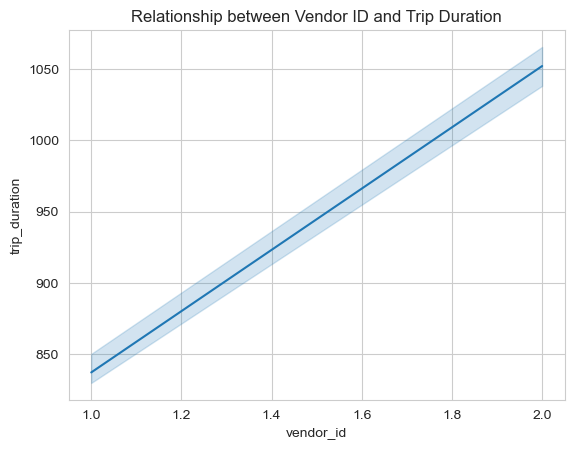

In [57]:
# Selecting the columns of interest
columns_of_interest = ['vendor_id', 'trip_duration']

# Subset the DataFrame with the selected columns
subset_data = nyc_taxi_trip_duration[columns_of_interest]

# Compute statistics for the variables
statistics = subset_data.describe()

# Plot line graph
plt.figure()
sns.lineplot(data=subset_data, x='vendor_id', y='trip_duration')
plt.title('Relationship between Vendor ID and Trip Duration')

# Show the statistics table
print(statistics)

In [ ]:
# from the above we can see that there is positive linear relationship between vendor_id and trip_duration.

In [34]:
# Select the predictor variables
predictors = ['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Add a constant column to the predictor variables
X = sm.add_constant(nyc_taxi_trip_duration[predictors])

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

            Variable           VIF
0              const  3.620679e+06
1          vendor_id  1.000134e+00
2   pickup_longitude  2.579360e+00
3    pickup_latitude  1.311946e+00
4  dropoff_longitude  2.609011e+00
5   dropoff_latitude  1.315415e+00


In [35]:
# there is some correlation among the variables, especially the longitude and latitude variables. 
# The degree of multicollinearity is not extremely high. 
# It may not significantly affect the interpretation of the individual impact of each variable on the target variable (trip_duration).
# variables with very high VIF values (greater than 5 or 10), indicates a strong multicollinearity issue. 
# It is addressed by selecting a subset of variables or employing dimensionality reduction techniques.

In [36]:
# Calculate correlation coefficients
passenger_corr = nyc_taxi_trip_duration['passenger_count'].corr(nyc_taxi_trip_duration['trip_duration'])
pickup_corr = nyc_taxi_trip_duration['pickup_longitude'].corr(nyc_taxi_trip_duration['trip_duration'])
dropoff_corr = nyc_taxi_trip_duration['dropoff_longitude'].corr(nyc_taxi_trip_duration['trip_duration'])
vendor_corr = nyc_taxi_trip_duration['vendor_id'].corr(nyc_taxi_trip_duration['trip_duration'])

# Print correlation results
print("Passenger count correlation with trip duration:", passenger_corr)
print("Pickup longitude correlation with trip duration:", pickup_corr)
print("Dropoff longitude correlation with trip duration:", dropoff_corr)
print("Vendor ID correlation with trip duration:", vendor_corr)

Passenger count correlation with trip duration: 0.013021978045956277
Pickup longitude correlation with trip duration: 0.03544731597675483
Dropoff longitude correlation with trip duration: 0.020663899050664333
Vendor ID correlation with trip duration: 0.02775179453705715


In [49]:
# Grouping the variables
numerical = ['passenger_count', 'trip_duration']
categorical = ['vendor_id', 'store_and_fwd_flag']
cat_geofence = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Subset the DataFrame based on the grouped variables
numerical_data = nyc_taxi_trip_duration[numerical]
categorical_data = nyc_taxi_trip_duration[categorical]
cat_geofence_data = nyc_taxi_trip_duration[cat_geofence]

# Print the grouped variables
print("Numerical Data:")
print(numerical_data)
print("\nCategorical Data:")
print(categorical_data)
print("\nCat Geofence Data:")
print(cat_geofence_data)

Numerical Data:
        passenger_count  trip_duration
0                     1            400
1                     2           1100
2                     2           1635
3                     6           1141
4                     1            848
...                 ...            ...
729317                2            296
729318                1            315
729319                1            673
729320                1            447
729321                4           1224

[729322 rows x 2 columns]

Categorical Data:
        vendor_id store_and_fwd_flag
0               2                  N
1               1                  N
2               2                  N
3               2                  N
4               1                  N
...           ...                ...
729317          2                  N
729318          1                  N
729319          1                  N
729320          1                  N
729321          2                  N

[729322 rows x 2 columns]

In [55]:
# Separate 'pickup_datetime' into components
nyc_taxi_trip_duration['pickup_datetime'] = pd.to_datetime(nyc_taxi_trip_duration['pickup_datetime'])
nyc_taxi_trip_duration['pickup_datetime_hour'] = nyc_taxi_trip_duration['pickup_datetime'].dt.hour
nyc_taxi_trip_duration['pickup_datetime_day_name'] = nyc_taxi_trip_duration['pickup_datetime'].dt.day_name()
nyc_taxi_trip_duration['pickup_datetime_month'] = nyc_taxi_trip_duration['pickup_datetime'].dt.month

# Separate 'dropoff_datetime' into components
nyc_taxi_trip_duration['dropoff_datetime'] = pd.to_datetime(nyc_taxi_trip_duration['dropoff_datetime'])
nyc_taxi_trip_duration['dropoff_datetime_hour'] = nyc_taxi_trip_duration['dropoff_datetime'].dt.hour
nyc_taxi_trip_duration['dropoff_datetime_day_name'] = nyc_taxi_trip_duration['dropoff_datetime'].dt.day_name()
nyc_taxi_trip_duration['dropoff_datetime_month'] = nyc_taxi_trip_duration['dropoff_datetime'].dt.month

# Print the modified DataFrame
nyc_taxi_trip_duration

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_hour,pickup_datetime_day_name,pickup_datetime_month,dropoff_datetime_hour,dropoff_datetime_day_name,dropoff_datetime_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,Monday,2,16,Monday,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,Friday,3,23,Friday,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,Sunday,2,18,Sunday,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,Tuesday,1,10,Tuesday,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,Wednesday,2,6,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296,13,Saturday,5,13,Saturday,5
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315,0,Monday,2,0,Monday,2
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673,18,Friday,4,19,Friday,4
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447,9,Sunday,6,9,Sunday,6


In [52]:
# Printing the names of the columns in the dataset.
print(nyc_taxi_trip_duration.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_datetime_hour', 'pickup_datetime_day_name',
       'pickup_datetime_month', 'dropoff_datetime_hour',
       'dropoff_datetime_day_name', 'dropoff_datetime_month'],
      dtype='object')


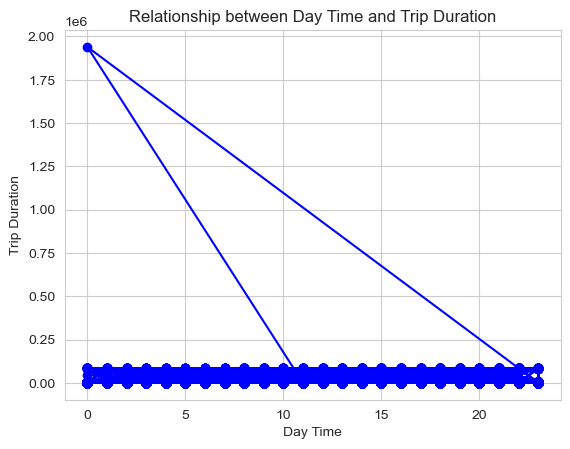

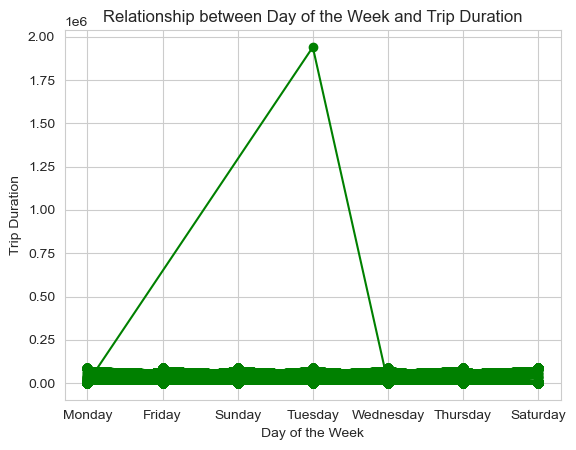

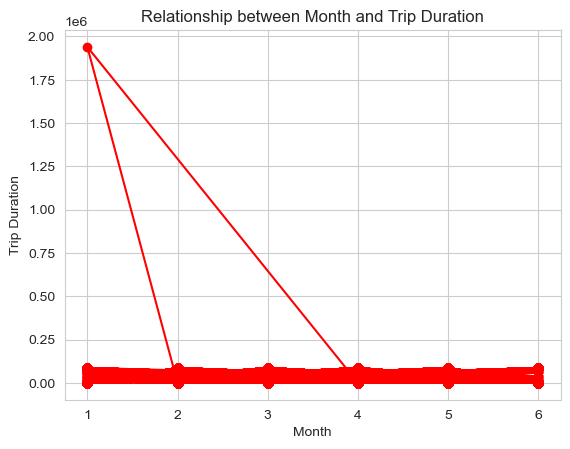

In [53]:
# Line graph for 'day time' vs 'trip duration'
plt.plot(nyc_taxi_trip_duration['pickup_datetime_hour'], nyc_taxi_trip_duration['trip_duration'], marker='o', linestyle='-', color='blue')
plt.xlabel('Day Time')
plt.ylabel('Trip Duration')
plt.title('Relationship between Day Time and Trip Duration')
plt.show()

# Line graph for 'day of the week' vs 'trip duration'
plt.plot(nyc_taxi_trip_duration['pickup_datetime_day_name'], nyc_taxi_trip_duration['trip_duration'], marker='o', linestyle='-', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration')
plt.title('Relationship between Day of the Week and Trip Duration')
plt.show()

# Line graph for 'month' vs 'trip duration'
plt.plot(nyc_taxi_trip_duration['pickup_datetime_month'], nyc_taxi_trip_duration['trip_duration'], marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Trip Duration')
plt.title('Relationship between Month and Trip Duration')
plt.show()

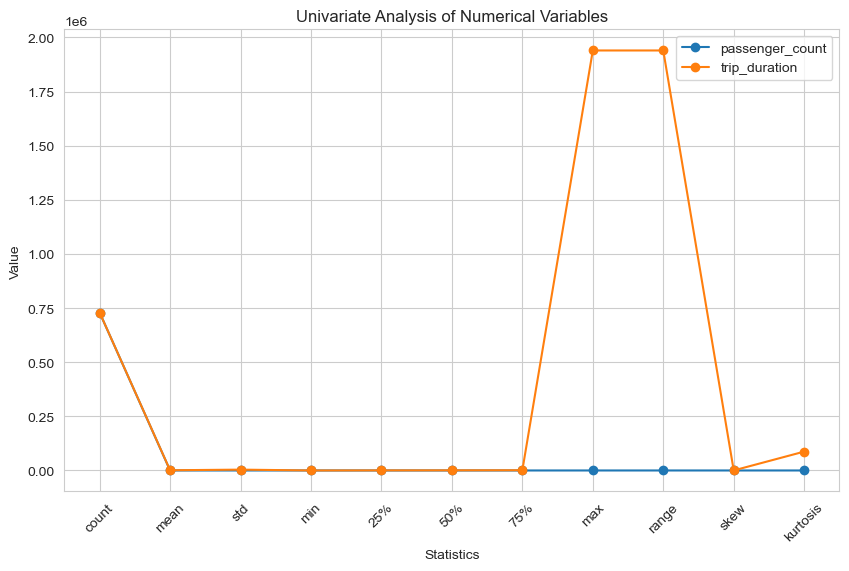

                    count        mean          std  min    25%    50%     75%  \
passenger_count  729322.0    1.662055     1.312446  0.0    1.0    1.0     2.0   
trip_duration    729322.0  952.229133  3864.626197  1.0  397.0  663.0  1075.0   

                       max      range        skew      kurtosis  
passenger_count        9.0        9.0    2.135237      3.464417  
trip_duration    1939736.0  1939735.0  186.678437  87142.463400  


In [54]:
# Assuming you have a DataFrame named 'nyc_taxi_trip_duration' with the numerical variables
numerical_variables = ['passenger_count', 'trip_duration']

# Subset the DataFrame with numerical variables
numerical_data = nyc_taxi_trip_duration[numerical_variables]

# Calculate statistical measures
stats = numerical_data.describe().transpose()
stats['range'] = stats['max'] - stats['min']
stats['skew'] = numerical_data.skew()
stats['kurtosis'] = numerical_data.kurtosis()

# Plot line graph
plt.figure(figsize=(10, 6))
for variable in numerical_variables:
    plt.plot(stats.loc[variable], marker='o', linestyle='-', label=variable)

plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Univariate Analysis of Numerical Variables')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print the statistical measures
print(stats)

In [ ]:
# passenger_count:
# The skewness is positive (2.14), suggesting a right-skewed distribution.
# The kurtosis is 3.46, indicating a moderately peaked distribution.
# trip_duration:
# The skewness is highly positive (186.68), indicating a highly right-skewed distribution.
# The kurtosis is extremely high (87,142.46), indicating a very peaked and heavy-tailed distribution.

# Insights or Conclusions
# We can conclude that the majority of taxi trips have a low passenger count (around 1). 
# Though trip durations vary significantly, with a wide range and a highly skewed distribution towards shorter durations.

       trip_duration  pickup_datetime_hour  pickup_datetime_month  \
count   7.293220e+05         729322.000000          729322.000000   
mean    9.522291e+02             13.611698               3.518410   
std     3.864626e+03              6.402853               1.680661   
min     1.000000e+00              0.000000               1.000000   
25%     3.970000e+02              9.000000               2.000000   
50%     6.630000e+02             14.000000               4.000000   
75%     1.075000e+03             19.000000               5.000000   
max     1.939736e+06             23.000000               6.000000   

       dropoff_datetime_hour  dropoff_datetime_month  
count           729322.00000           729322.000000  
mean                13.60616                3.518764  
std                  6.48637                1.680815  
min                  0.00000                1.000000  
25%                  9.00000                2.000000  
50%                 14.00000                4.00

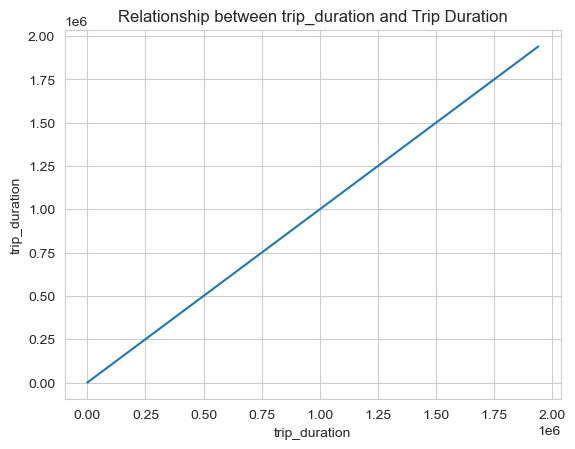

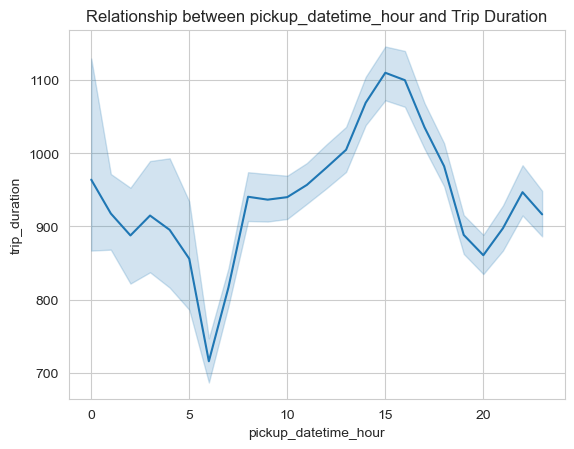

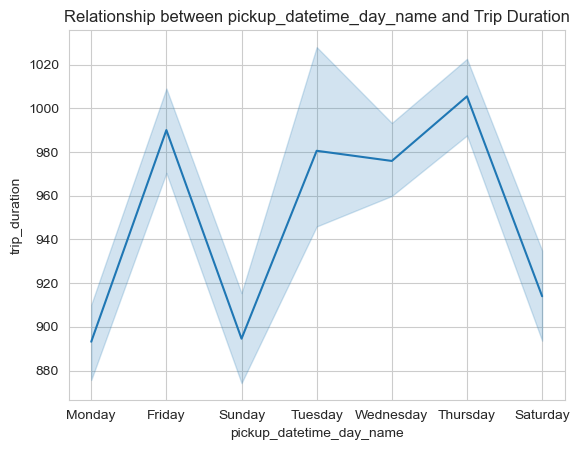

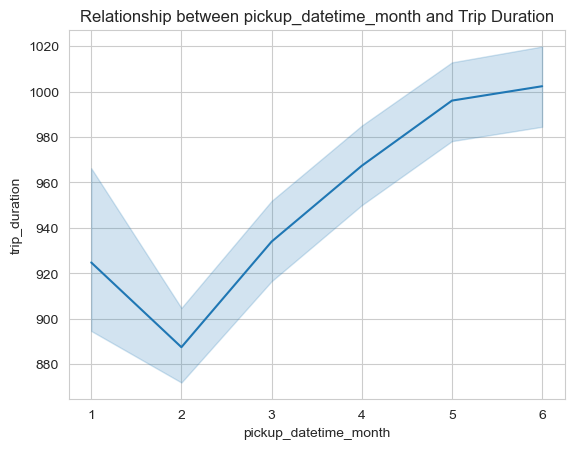

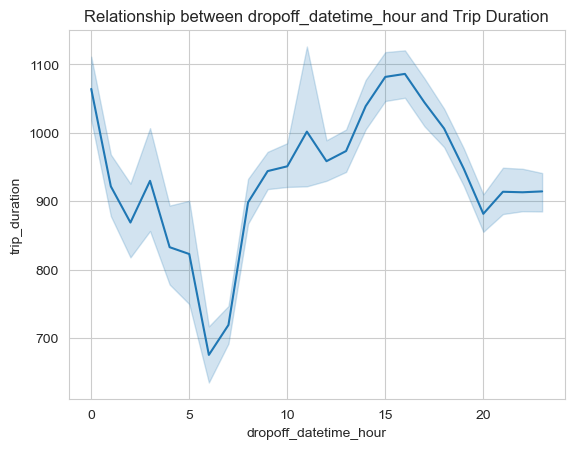

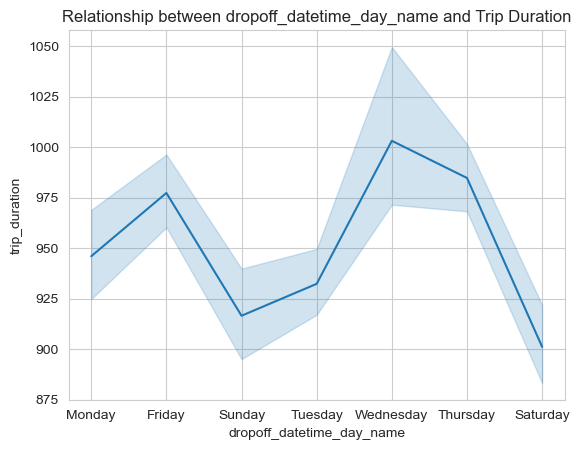

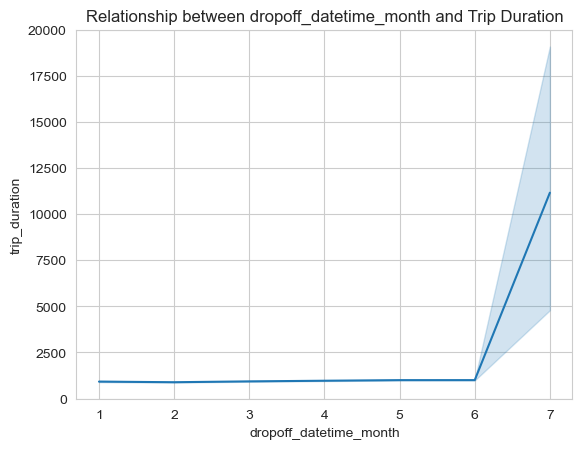

In [56]:
# Selecting the columns of interest
columns_of_interest = ['trip_duration', 'pickup_datetime_hour', 'pickup_datetime_day_name',
                       'pickup_datetime_month', 'dropoff_datetime_hour',
                       'dropoff_datetime_day_name', 'dropoff_datetime_month']

# Subset the DataFrame with the selected columns
subset_data = nyc_taxi_trip_duration[columns_of_interest]

# Compute statistics for each variable
statistics = subset_data.describe()

# Plot line graphs for each variable
for column in columns_of_interest:
    plt.figure()
    sns.lineplot(data=subset_data, x=column, y='trip_duration')
    plt.title(f'Relationship between {column} and Trip Duration')

# Show the statistics table
print(statistics)

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     729322.000000    729322.000000      729322.000000     729322.000000   
mean         -73.973513        40.750919         -73.973422         40.751775   
std            0.069754         0.033594           0.069588          0.036037   
min         -121.933342        34.712234        -121.933304         32.181141   
25%          -73.991859        40.737335         -73.991318         40.735931   
50%          -73.981758        40.754070         -73.979759         40.754509   
75%          -73.967361        40.768314         -73.963036         40.769741   
max          -65.897385        51.881084         -65.897385         43.921028   

       trip_duration  
count   7.293220e+05  
mean    9.522291e+02  
std     3.864626e+03  
min     1.000000e+00  
25%     3.970000e+02  
50%     6.630000e+02  
75%     1.075000e+03  
max     1.939736e+06  


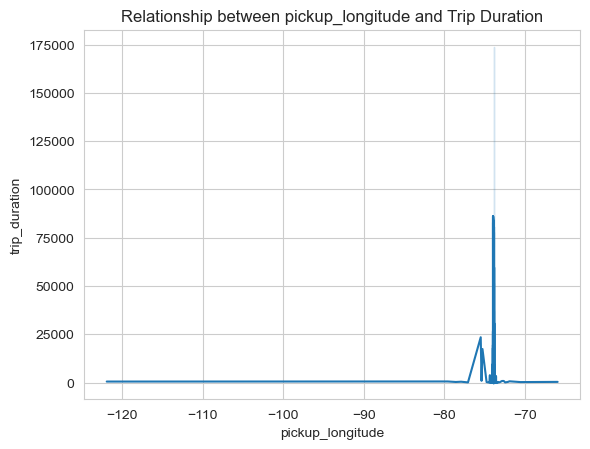

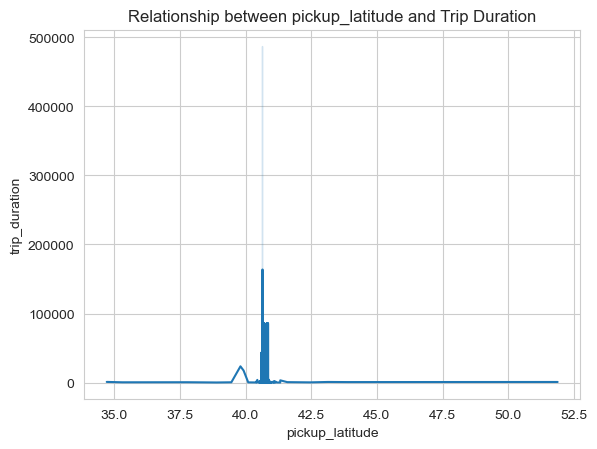

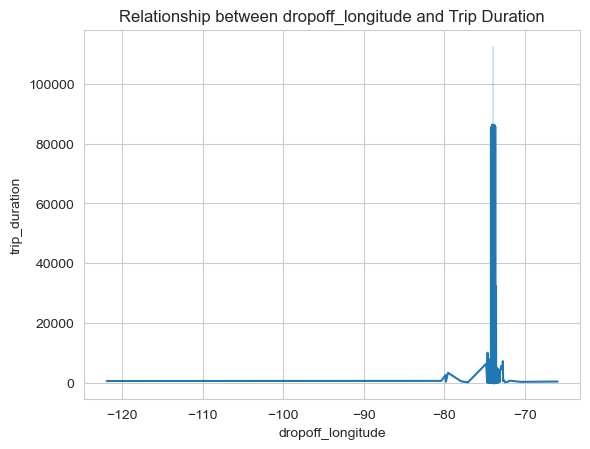

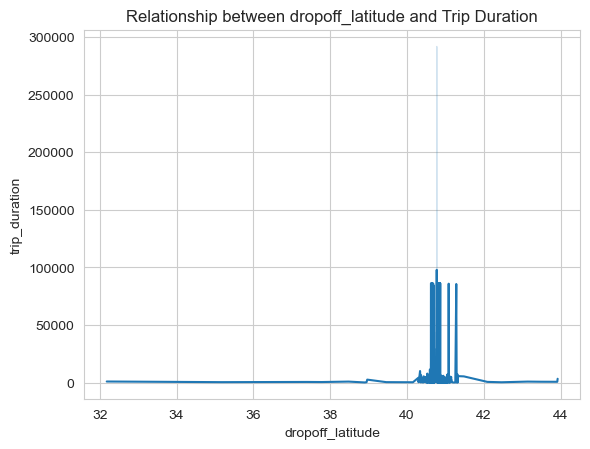

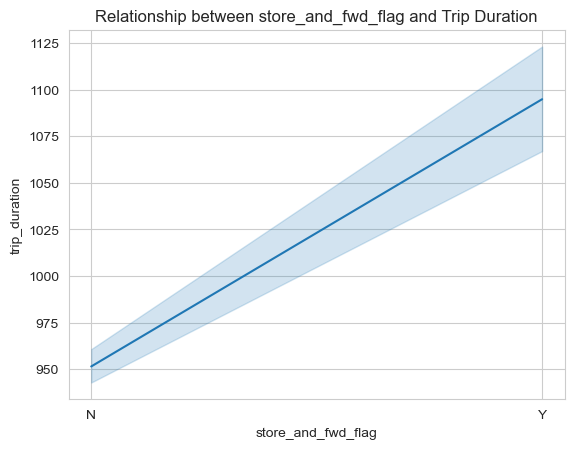

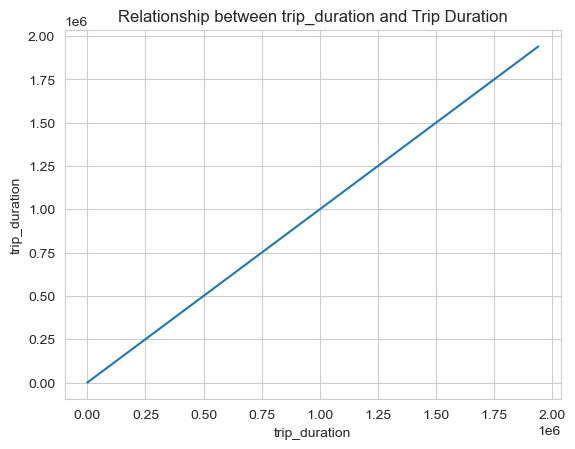

In [58]:
# Selecting the columns of interest
columns_of_interest = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
                       'store_and_fwd_flag', 'trip_duration']

# Subset the DataFrame with the selected columns
subset_data = nyc_taxi_trip_duration[columns_of_interest]

# Compute statistics for the variables
statistics = subset_data.describe()

# Plot line graphs
for column in subset_data.columns:
    plt.figure()
    sns.lineplot(data=subset_data, x=column, y='trip_duration')
    plt.title(f'Relationship between {column} and Trip Duration')

# Show the statistics table
print(statistics)

In [ ]:
# Insights and Conclusions

# pickup_longitude and dropoff_longitude:
# both have a mean close to -73.97, indicating that the majority of pickups and drop-offs occur around this longitude in the dataset. 
# Similarly, the mean values for pickup_latitude and dropoff_latitude are approximately 40.75.
# This suggests that most of the locations are around this latitude.

# Trip Duration: 
# The average trip duration is approximately 952 seconds (or 15.87 minutes). 
# The standard deviation is quite large at 3864 seconds, indicating a wide variation in trip durations. 
# minimum duration is 1 second, while the maximum duration is 1,939,736 seconds (or 539.37 hours). 
# This indicates that there are both very short and very long trips in the dataset.

